In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'
import tensorflow as tf
import numpy as np
import PIL
#import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import Sequential
from tensorflow.compat.v1 import ConfigProto

model_path = "/media/2/Network/pretrained_model/vgg_model.h5"
#model_path = "/media/2/Network/pretrained_model/back_layers.h5"
#img_path = "/media/2/Network/Imagenet_dup/val/n01440764" # tench // 449 
img_path = "/media/2/Network/Imagenet_dup/val/n01443537" # goldfish // 450 
#img_path = "/media/2/Network/Imagenet_dup/val/n02074367"# dugong
class_name = "goldfish"
config = ConfigProto()
config.gpu_options.allow_growth = True

In [2]:
!ls /media/2/Network/pretrained_model/

back_layers.h5	    back_layers_7.h5  fc123_weights.h5		   vgg_model.h5
back_layers_19~.h5  fc123_model.h5    pretrained_packet_drop_1.h5


In [3]:
os.path.isfile(model_path)

True

In [4]:
#!ls /media/2/Network/Imagenet_dup/val

In [5]:
tf.__version__

'2.3.0'

In [6]:
model=load_model(model_path)
model.summary()
#til_pooling4_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
til_pooling4_model = Sequential([layer for layer in model.layers[:15]])
til_predict = Sequential([layer for layer in model.layers[15:]])

In [8]:
til_pooling4_model.build((None, 224,224,3))
til_pooling4_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [9]:
til_predict.build((None, 14,14,512))
til_predict.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block5_conv1 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   (None, 7, 7, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)             

In [10]:
imgs = os.listdir(img_path) 
imgs[0]
print(img_path+"/"+imgs[0])

/media/2/Network/Imagenet_dup/val/n01443537/ILSVRC2012_val_00021905.JPEG


In [11]:
!ls /media/2/hwbae0326/tensor_completion/

Untitled1.ipynb  featuremap_plot.ipynb	pooling4_feature  tench_class_pooling4


In [12]:
!mkdir pooling4_feature

mkdir: cannot create directory ‘pooling4_feature’: File exists


In [13]:
pwd = "/media/2/hwbae0326/tensor_completion/"
save_path = "pooling4_feature"
tench_feature=[] #pooling4
for img in imgs:
    path = os.path.join(img_path,img)
    img = PIL.Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    img = np.expand_dims(img,axis=0)
    #print(img.shape)
    print(".",end="")
    a = til_pooling4_model.predict(img)
    #print(a.shape)
    tench_feature.extend(a)
tench_feature = np.array(tench_feature)
print(tench_feature.shape)
np.save(pwd+save_path+"/"+str(class_name)+"_pooling4",tench_feature)

..................................................(50, 14, 14, 512)


In [14]:
# feature visulization
# feature_path = "/media/2/hwbae0326/tensor_completion/"+save_path+"/tench_pooling4"
# tench_feature = np.load(feature_path,mmap_mode="r")
tench_feature.shape


(50, 14, 14, 512)

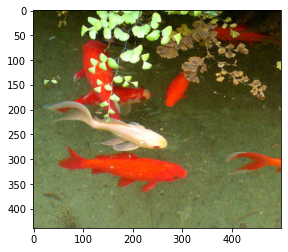

In [15]:
img = PIL.Image.open(img_path+"/"+imgs[0])
img.show()
plt.imshow(img)

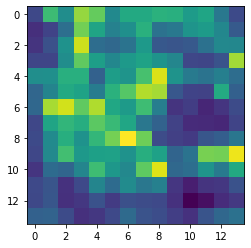

In [16]:

pic0 = tench_feature[0][:,:,0]
for i in range(0,512):
    pic0 = pic0 + tench_feature[0][:,:,i]
plt.imshow(pic0)#,cmap='gray')

In [17]:
w = 10
h = 10
cols = 32
rows = 16

def feature_print(pic_num=(0)):
    print("test with 'after pooling 4 feature'")
    print("pic_num : "+str(pic_num))
    fig = plt.figure(figsize=(64,32))
    ax = []
    for i in range(cols*rows):
        ch = tench_feature[pic_num][:,:,i]
        ax.append(fig.add_subplot(rows,cols,i+1))
        ax[-1].set_title(str(i)+"th ch (14x14)")
        plt.imshow(ch)

test with 'after pooling 4 feature'
pic_num : 0


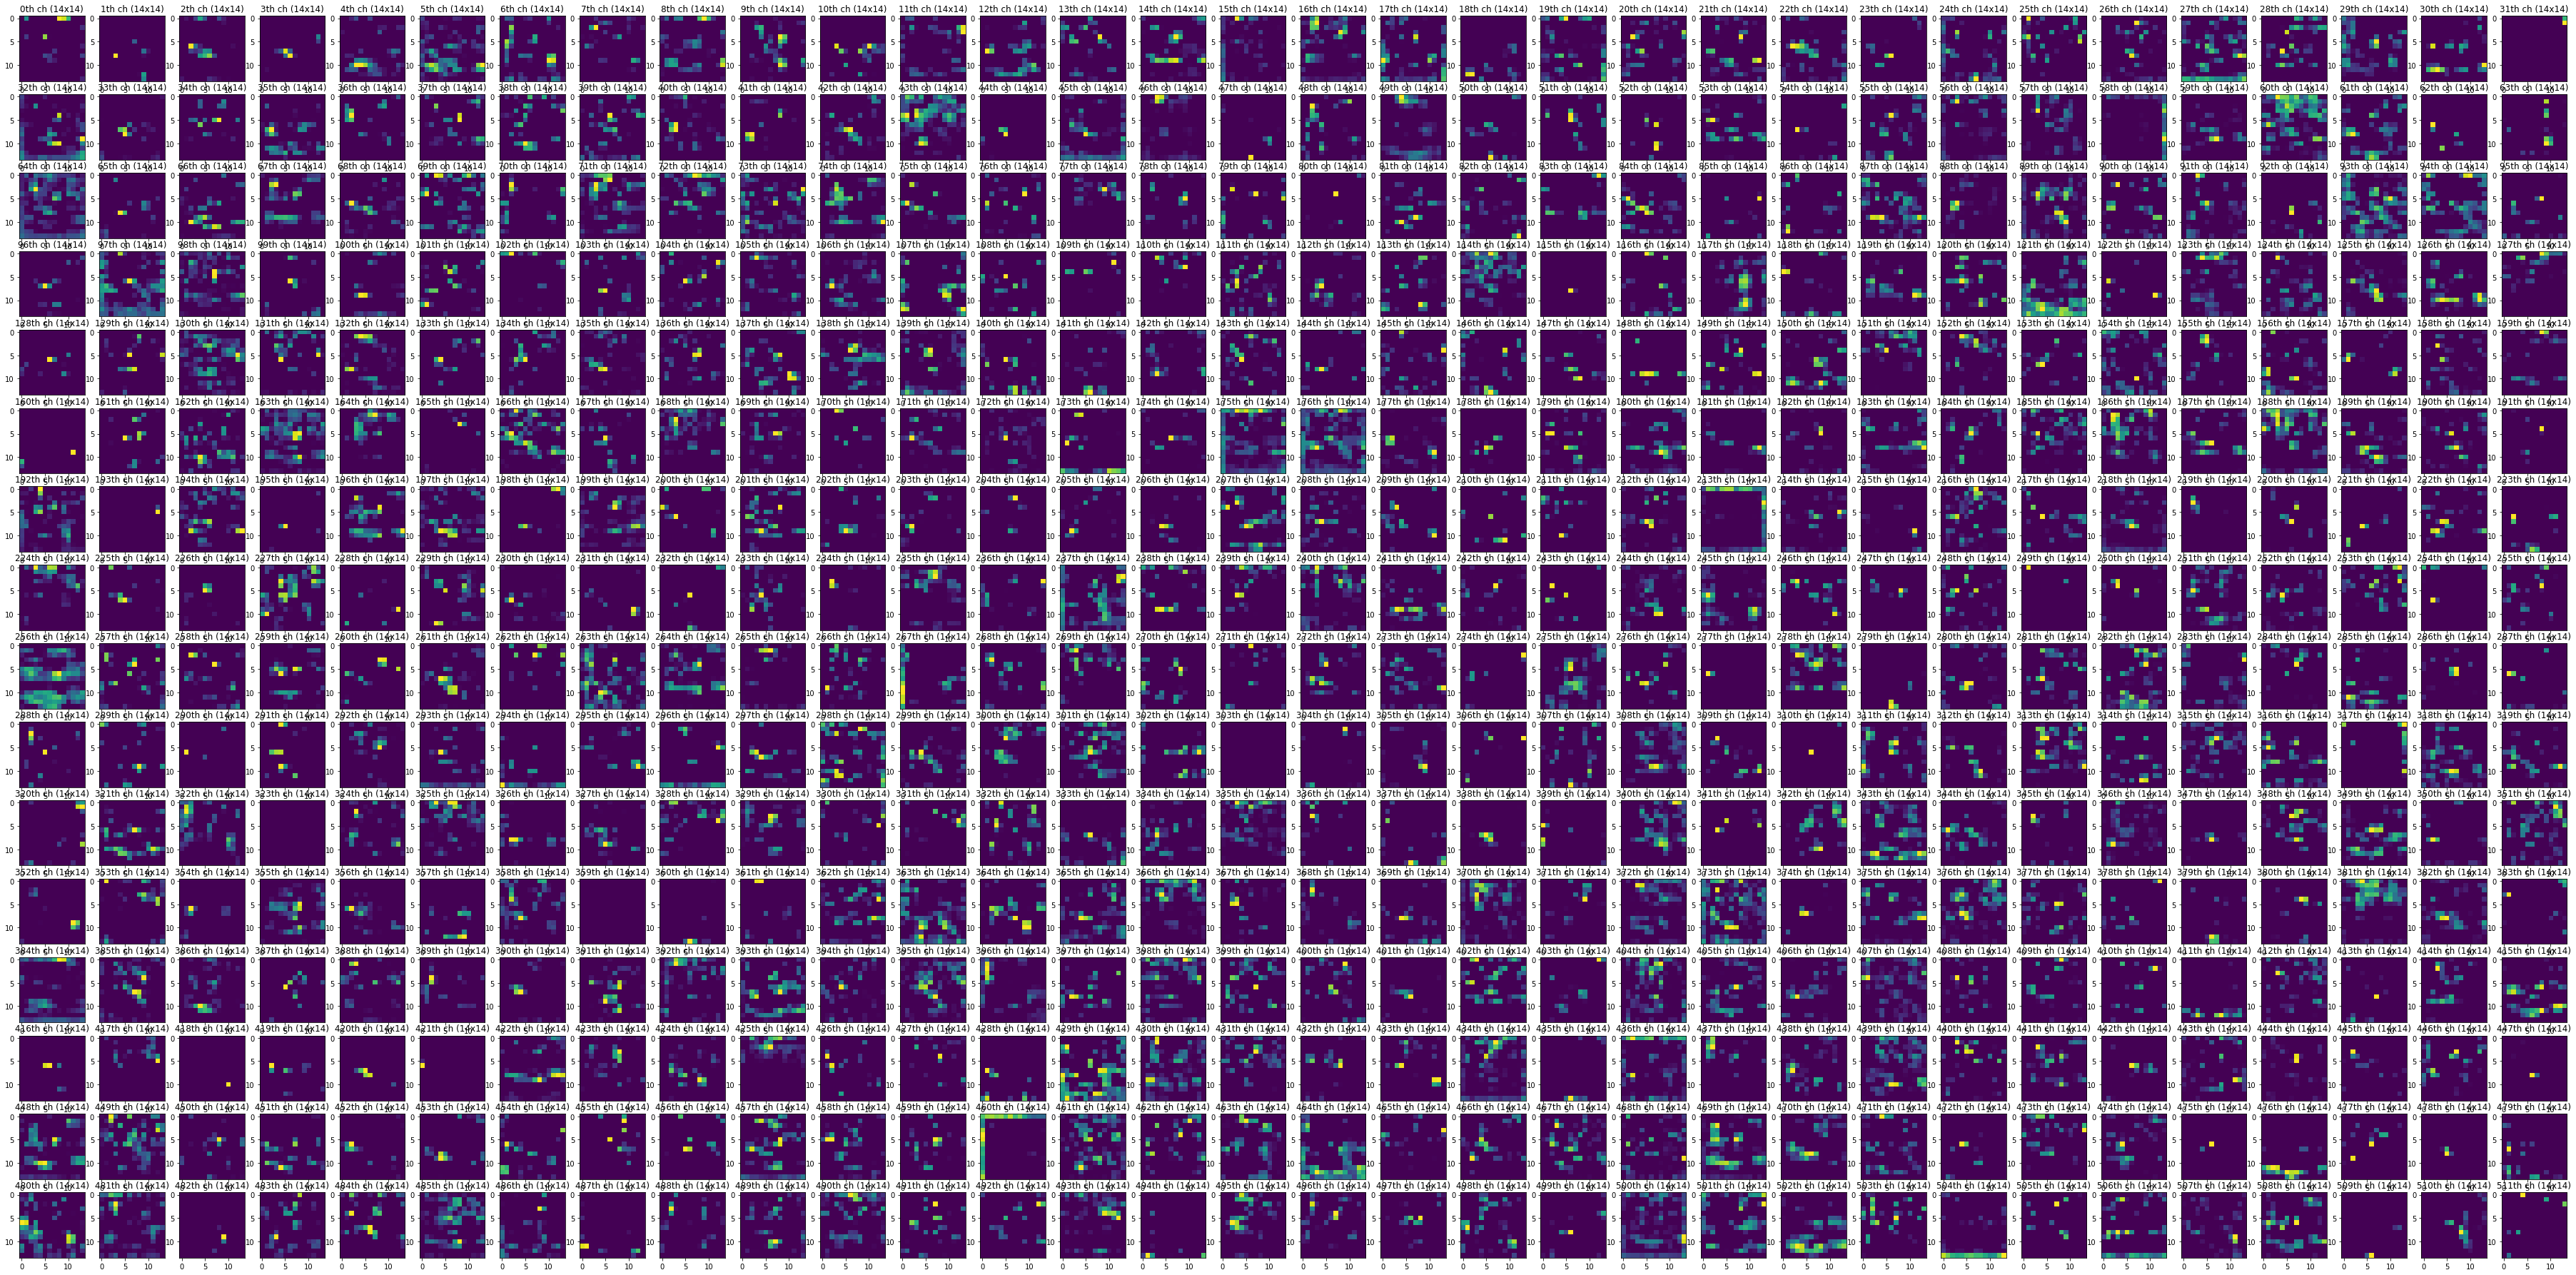

In [18]:
feature_print(0)

In [19]:
zero = np.zeros((14,14))
zero.shape

(14, 14)

In [30]:
# sum up all feature which has over 30% non-zero
first = 1
count = 0
nonzero_30per = 0
sum_data_30per = np.zeros((14,14))
#data_30per = np.zeros((14,14))
#print(tench_feature[1][:,:,0])
pic_num = 10
for i in range(512):
    #print(np.array_equal(tench_feature[1][:,:,i],zero))
    if(np.array_equal(tench_feature[pic_num][:,:,i],zero)):
        count +=1
    if(np.count_nonzero(tench_feature[pic_num][:,:,i]) > 14*14*0.3):
        sum_data_30per += tench_feature[pic_num][:,:,i]
        #print(tench_feature[pic_num][:,:,i].shape)
        if first == 1:
            data_30per = tench_feature[pic_num][:,:,i]
            first = 0
        else :
            data_30per = np.dstack((data_30per,tench_feature[pic_num][:,:,i]))
        nonzero_30per +=1
    else :
        if first == 1: 
            data_30per = np.zeros((14,14))
            first = 0
        else :
            data_30per = np.dstack((data_30per,np.zeros((14,14))))
        
        
data_30per /= nonzero_30per;
#data_30per = np.array(data_30per)
#print(data_30per[0][0])
#data_30per = np.swapaxes(data_30per,2,2).reshape(14,14,-1)
#print(data_30per[:,:,0][0])
print(count,count/512)
print("nonzero80% :",nonzero_30per)
print(data_30per.shape)

1 0.001953125
nonzero80% : 74
(14, 14, 512)


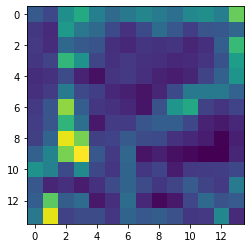

In [31]:
plt.imshow(sum_data_30per)

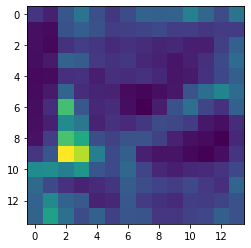

In [32]:
pic0 = tench_feature[pic_num][:,:,0]
for i in range(0,512):
    pic0 = pic0 + tench_feature[pic_num][:,:,i]
plt.imshow(pic0)#,cmap='gray')

In [33]:

#if(nonzero_20per <512):
#    for i in range(512-nonzero_20per):
#        data_30per = np.dstack((data_30per,np.zeros((14,14) )))
#data_30per.shape

In [34]:
per30 = np.expand_dims(data_30per,axis=0)
per30_a = til_predict.predict(per30)

In [35]:
pic0 = np.expand_dims(pic0,axis=0)
a = til_predict.predict(tench_feature)

In [36]:
cnt=0
for i in range(50):
    if(a[i].argmax() == 1):
        cnt+=1
    #print(a[i].argmax())
print(cnt/50)
print(a[0].shape)

0.88
(1000,)


In [38]:

print(a[pic_num].argmax(),"vs",per30_a.argmax())

1 vs 980


In [28]:
a[0].shape

(1000,)